In [3]:
import pandas as pd
import keras
import numpy as np

Using TensorFlow backend.


In [4]:
data = pd.read_csv('./train.csv')

In [5]:
data.head() # 查看前5行,分析特征，把字符数值化

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()  # 查看行数

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
y = data.Survived  #选取y

In [8]:
x = data[[ 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked']]  #选取x

In [9]:
x.Embarked.unique()  # 输出唯一值

array(['S', 'C', 'Q', nan], dtype=object)

独热编码(在哪一列，哪一列被置换为1，其他列为0)

In [10]:
x.loc[:,'Embarked_S'] = (x.Embarked =='S').astype('int') #把S转换为1，数值化

C:\Users\12415\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\12415\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
x.loc[:,'Embarked_C'] = (x.Embarked =='C').astype('int') #把C转换为1，数值化
x.loc[:,'Embarked_Q'] = (x.Embarked =='Q').astype('int') #把Q转换为1，数值化

C:\Users\12415\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\12415\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
del x['Embarked'] #删除被数字化过的字符

In [13]:
x['Sex'] = (x.Sex == 'male').astype('int')  #数字化,直接替换

C:\Users\12415\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
x['Age'] = x.Age.fillna(x.Age.mean()) # 使用Age的均值来填充null值

C:\Users\12415\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
x['p1'] = (x.Pclass == 1).astype('int')
x['p2'] = (x.Pclass == 1).astype('int')
x['p3'] = (x.Pclass == 1).astype('int') # 数值化

C:\Users\12415\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\12415\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
del x['Pclass']

In [17]:
x

,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,p1,p2,p3
0,1,22.000000,1,0,7.2500,1,0,0,0,0,0
1,0,38.000000,1,0,71.2833,0,1,0,1,1,1
2,0,26.000000,0,0,7.9250,1,0,0,0,0,0
3,0,35.000000,1,0,53.1000,1,0,0,1,1,1
4,1,35.000000,0,0,8.0500,1,0,0,0,0,0
5,1,29.699118,0,0,8.4583,0,0,1,0,0,0
6,1,54.000000,0,0,51.8625,1,0,0,1,1,1
7,1,2.000000,3,1,21.0750,1,0,0,0,0,0
8,0,27.000000,0,2,11.1333,1,0,0,0,0,0
9,0,14.000000,1,0,30.0708,0,1,0,0,0,0


In [17]:
x.shape, y.shape

((891, 11), (891,))

In [18]:
import tensorflow as tf
from tensorflow import keras   # 引用层
model = keras.Sequential() #初始化，建立一个顺序模型
from tensorflow.keras import layers #从keras引用层

In [19]:
model.add(layers.Dense(1, input_dim=11, activation='sigmoid')) # y_pre = w1*x1 + w2*x2 +...+w11*x11 + b
                                                        #添加sigmoid运算，变成概率输出

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',        #编译模型
              loss='binary_crossentropy', #优化的是二元的交叉熵
              metrics=['acc']         # 输出准确率
)

In [22]:
history = model.fit(x, y, epochs=300) 

Train on 891 samples
Epoch 1/300
891/891 [==============================] - 0s 503us/sample - loss: 2.4982 - acc: 0.6465
Epoch 2/300
891/891 [==============================] - 0s 121us/sample - loss: 2.4451 - acc: 0.6510
Epoch 3/300
891/891 [==============================] - 0s 113us/sample - loss: 2.3933 - acc: 0.6577
Epoch 4/300
891/891 [==============================] - 0s 111us/sample - loss: 2.3432 - acc: 0.6566
Epoch 5/300
891/891 [==============================] - 0s 107us/sample - loss: 2.2891 - acc: 0.6599
Epoch 6/300
891/891 [==============================] - 0s 110us/sample - loss: 2.2317 - acc: 0.6633
Epoch 7/300
891/891 [==============================] - 0s 82us/sample - loss: 2.1740 - acc: 0.6633
Epoch 8/300
891/891 [==============================] - 0s 92us/sample - loss: 2.1152 - acc: 0.6633
Epoch 9/300
891/891 [==============================] - 0s 93us/sample - loss: 2.0511 - acc: 0.6667
Epoch 10/300
891/891 [==============================] - 0s 94us/sample - loss: 1.9

891/891 [==============================] - 0s 84us/sample - loss: 0.4571 - acc: 0.8070
Epoch 162/300
891/891 [==============================] - 0s 87us/sample - loss: 0.4583 - acc: 0.8159
Epoch 163/300
891/891 [==============================] - 0s 79us/sample - loss: 0.4554 - acc: 0.8159
Epoch 164/300
891/891 [==============================] - 0s 79us/sample - loss: 0.4547 - acc: 0.8148
Epoch 165/300
891/891 [==============================] - 0s 90us/sample - loss: 0.4562 - acc: 0.8126
Epoch 166/300
891/891 [==============================] - 0s 85us/sample - loss: 0.4559 - acc: 0.8159
Epoch 167/300
891/891 [==============================] - 0s 84us/sample - loss: 0.4577 - acc: 0.8148
Epoch 168/300
891/891 [==============================] - 0s 84us/sample - loss: 0.4547 - acc: 0.8171
Epoch 169/300
891/891 [==============================] - 0s 84us/sample - loss: 0.4548 - acc: 0.8103
Epoch 170/300
891/891 [==============================] - 0s 78us/sample - loss: 0.4548 - acc: 0.8148
Epoc

In [23]:
history.history.keys()

dict_keys(['loss', 'acc'])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

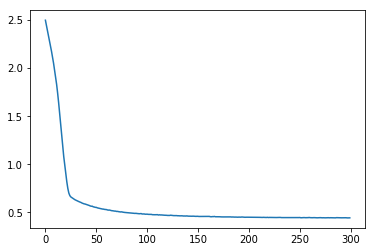

In [26]:
plt.plot(range(300),history.history.get('loss'))    #从第0个epochs开始训练  loss值的变化
                                        #可以看的出优化的速率和一些节点

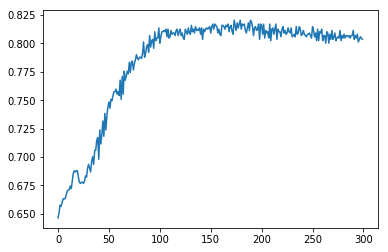

In [27]:
plt.plot(range(300),history.history.get('acc'))   